In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:

df = pd.read_csv("rest dataset.csv", encoding="utf-8-sig")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# data cleaning



In [62]:
#Removing nan values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [63]:
#Removing unwanted columns
df.drop(['Country Code','Address','Locality','Locality Verbose','Switch to order menu'],axis=1,inplace=True)
df.head()

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229


In [64]:
#Replacing � with ''
df['Restaurant Name']=df['Restaurant Name'].str.replace('�','')
df['Restaurant Name'].unique()

array(['Le Petit Souffle', 'Izakaya Kikufuji', 'Heat - Edsa Shangri-La',
       ..., 'Huqqa', 'Ak Kahve', "Walter's Coffee Roastery"], dtype=object)

In [65]:
#Replacing values
df['City']=df['City'].str.replace('Bras�_lia','Brasilia')
df['City']=df['City'].str.replace('S��o Paulo','Sao Paulo')
df['City']=df['City'].str.replace('��stanbul','Istanbul')
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasilia', 'Rio de Janeiro', 'Sao Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Monroe', 'Montville', 'Ojo Caliente', 'Orlando', 'Palm Cove',
       'Paynesville', 'Penola', 'Pensacola', 'Phillip Island',
       'Pocatello', 'Potrero', 'Princeton', 'Rest of Hawaii', 'Savannah',
       'Singapore', 'Sioux City', 'Tampa Bay', 'Tanunda', 'Trentham East',
       'Va

In [66]:
#Cleaning Currency column
df['Currency']=df['Currency'].str.replace('Pounds(��)','Pounds(£)')
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [67]:
#Renaming the columns
df.rename(columns={'Average Cost for two':'costfor2','Has Table booking':'book_table','Has Online delivery':'online_order','Is delivering now':'Delivering_Now','Aggregate rating':'Rating'},inplace=True)
df

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,costfor2,Currency,book_table,online_order,Delivering_Now,Price range,Rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Istanbul,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac۱,Istanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,Istanbul,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,Istanbul,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901


# data visualization


In [68]:
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

# Top cuisines

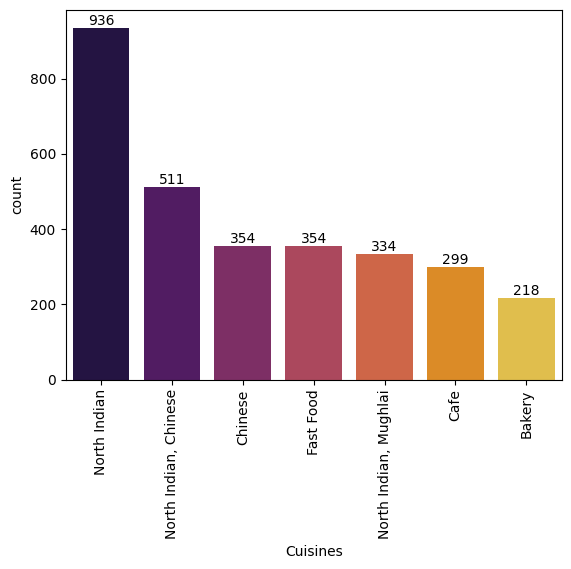

In [69]:
#Determine the top three most common cuisines in the dataset
cuisines=pd.DataFrame(df['Cuisines'].value_counts())[:7]
cuisines
a=sns.barplot(x='Cuisines',y='count',data=cuisines,hue='Cuisines',palette='inferno')
data_label(a)
plt.xticks(rotation=90)
plt.show()


**North Indian, Chinese and fast food are the Top 3 most common cuisines**

In [70]:
#calculate the percentage of restaurants that serve each of the top cuisines.
cui=pd.DataFrame(df['Cuisines'].value_counts()).reset_index()
cui
d={'North Indian':0,'Chinese':0,'Fast Food':0}
for i in df['Cuisines']:
    if 'north indian' in i.lower() or 'north indian' == i.lower():
      d['North Indian']+=1
    elif 'chinese' in i.lower() or 'chinese' == i.lower():
      d['Chinese']+=1
    elif  'fast food' in i.lower() or 'fast food' == i.lower():
      d['Fast Food']+=1
new=pd.Series(d,name='count')
new=pd.DataFrame(new).reset_index()
new.rename(columns={'index':'Top Cuisines'},inplace=True)
new

,Top Cuisines,count
0,North Indian,3960
1,Chinese,951
2,Fast Food,1272


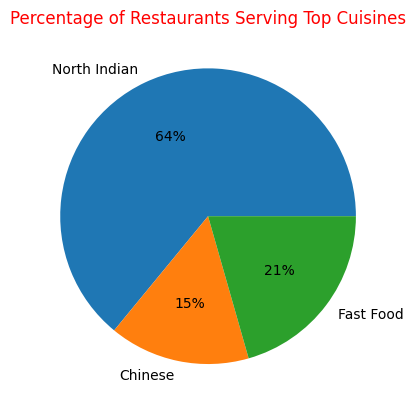

In [71]:
plt.pie(new['count'],labels=new['Top Cuisines'],autopct='%0.0f%%')
plt.title('Percentage of Restaurants Serving Top Cuisines',color='red')
plt.show()

# city analysis


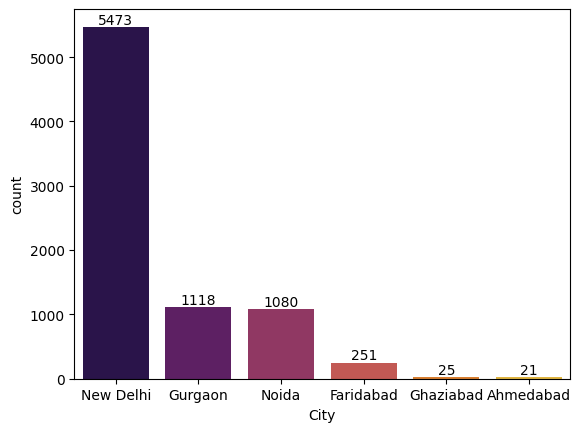

In [72]:
#Identify the city with the highest number of restaurants in the dataset.
city=pd.DataFrame(df['City'].value_counts())[:6]
city

a=sns.barplot(x='City',y='count',data=city,hue='City',palette='inferno')
data_label(a)

**New delhi is having highest no.of restaurants.**

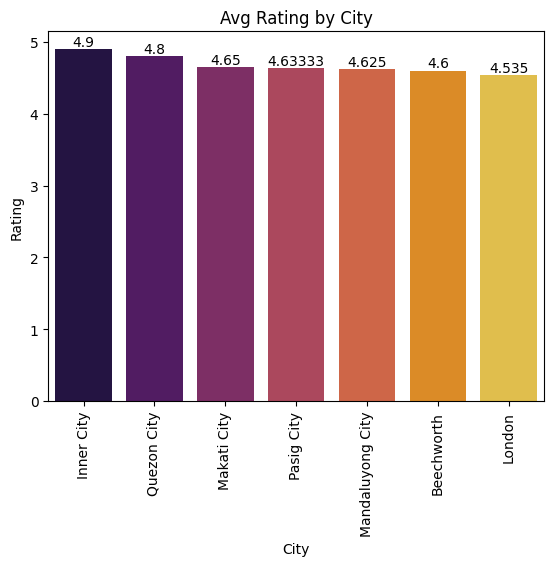

In [73]:
#Calculate the average rating for restaurants in each city.
#Determine the city with the highest average rating.
avg_rating=pd.DataFrame(df.groupby('City')['Rating'].mean()).sort_values(by='Rating',ascending=False)[:7]
avg_rating
a=sns.barplot(x='City',y='Rating',data=avg_rating,hue='City',palette='inferno')
plt.title('Avg Rating by City')
plt.xticks(rotation=90)
data_label(a)

**Inner city is having highest average rating.**

#Price Range Distribution

<Axes: xlabel='Price range', ylabel='Count'>

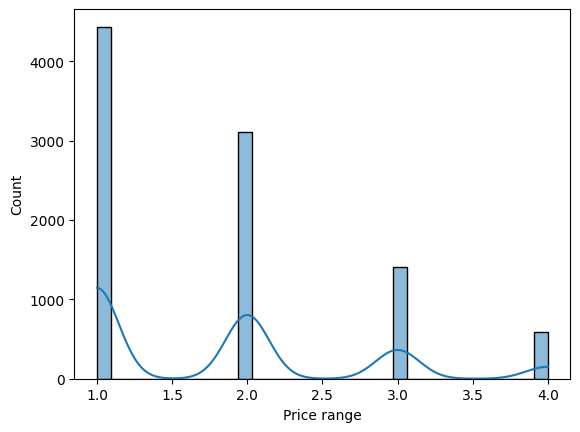

In [74]:
#Create a histogram or bar chart to visualize the distribution of price ranges
#among the restaurants.
sns.histplot(x='Price range',kde=True,data=df)

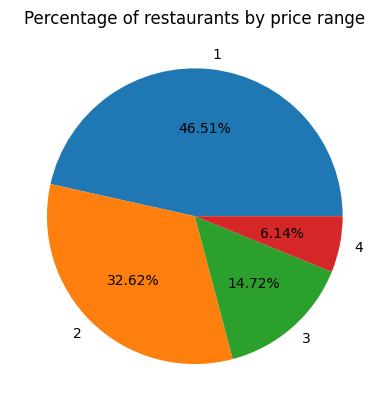

In [75]:
#Calculate the percentage of restaurants in each price range category.
price=df['Price range'].value_counts()
price=pd.DataFrame(price).reset_index()
price
plt.pie(price['count'],labels=price['Price range'],autopct='%0.02f%%')
plt.title('Percentage of restaurants by price range')
plt.show()

**Restaurants with price range 1 and 2 are more compared to others.**

# Online Delivery

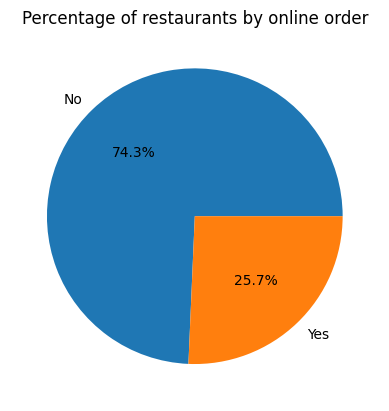

In [76]:
#Determine the percentage of restaurants that offer online delivery
online=df['online_order'].value_counts()
online=pd.DataFrame(online).reset_index()
online
plt.pie(online['count'],labels=online['online_order'],autopct='%0.1f%%')
plt.title('Percentage of restaurants by online order')
plt.show()

**only 25.7% of restaurants are providing online order delivery.**

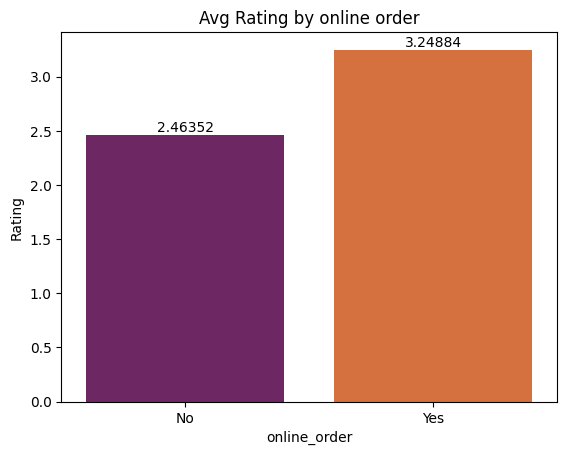

In [77]:
#compare the avg ratings of restaurants with and without online delivery
a=sns.barplot(x='online_order',y='Rating',data=df,errorbar=None,hue='online_order',palette='inferno')
plt.title('Avg Rating by online order')
data_label(a)

**Retaurants which are providing online order delivery are Rated more.**

# Restaurant Ratings

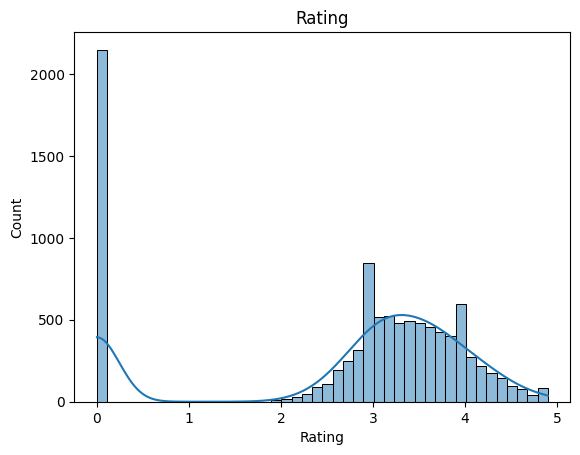

In [78]:
#Analyze the distribution of aggregate ratings and determine the most common rating range.
sns.histplot(x='Rating',data=df,kde=True)
plt.title('Rating')
plt.show()

**The most common rating range is in between 3 to 4.**

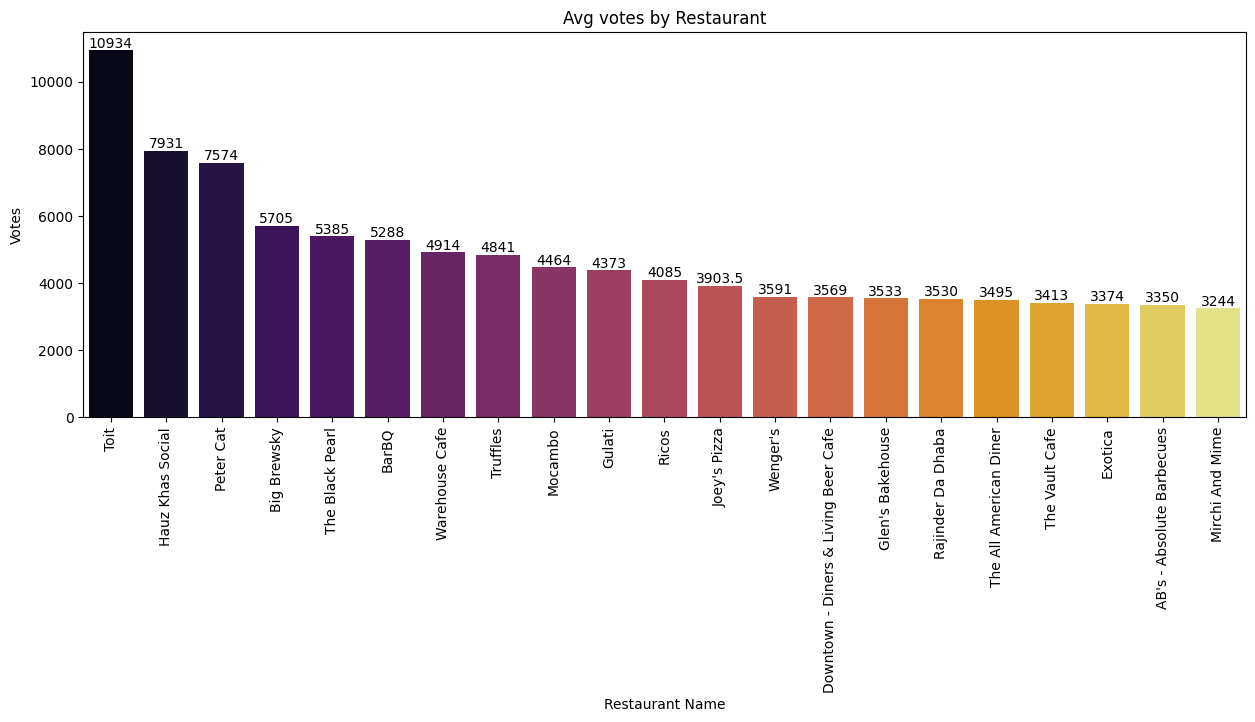

In [79]:
#Calculate the avg no.of votes received by restaurants.

avg=df.pivot_table(values='Votes',index='Restaurant Name').sort_values(by='Votes',ascending=False)
plt.figure(figsize=(15,5))
a=sns.barplot(x='Restaurant Name',y='Votes',data=avg[:21],hue='Restaurant Name',palette='inferno')
plt.title('Avg votes by Restaurant')
plt.xticks(rotation=90)
data_label(a)

# Cuisine Combination

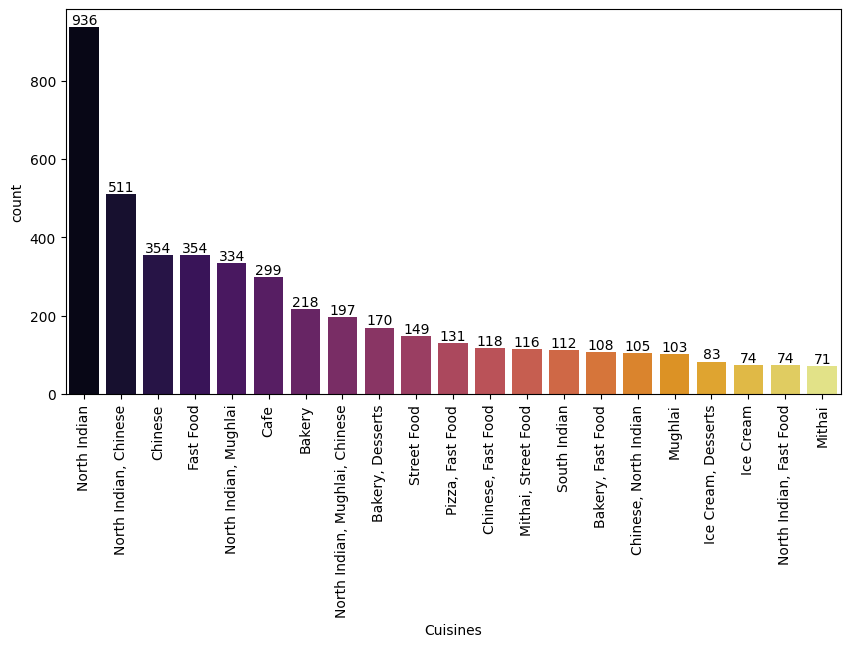

In [80]:
# Identify the most common combinations of cuisines in the dataset.
cui=pd.DataFrame(df['Cuisines'].value_counts())
plt.figure(figsize=(10,5))
a=sns.barplot(x='Cuisines',y='count',data=cui[:21],hue='Cuisines',palette='inferno')
data_label(a)
plt.xticks(rotation=90)
plt.show()

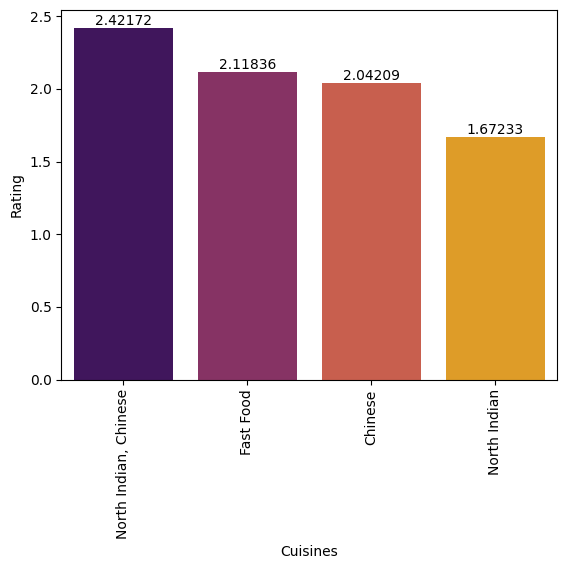

In [81]:
# Determine if certain cuisine combinations tend to have higher ratings.
avg=df.groupby('Cuisines')['Rating'].mean()
avg=pd.DataFrame(avg).reset_index().sort_values(by='Rating',ascending=False)
filtered=avg[(avg['Cuisines']=='North Indian') | (avg['Cuisines']=='North Indian, Chinese') | (avg['Cuisines']=='Chinese') | (avg['Cuisines']=='Fast Food')]
a=sns.barplot(x='Cuisines',y='Rating',data=filtered,hue='Cuisines',palette='inferno')
data_label(a)
plt.xticks(rotation=90)
plt.show()

**Avg rating for top most common cuisines is less.**

# Geographic Analysis

<Axes: xlabel='Longitude', ylabel='Latitude'>

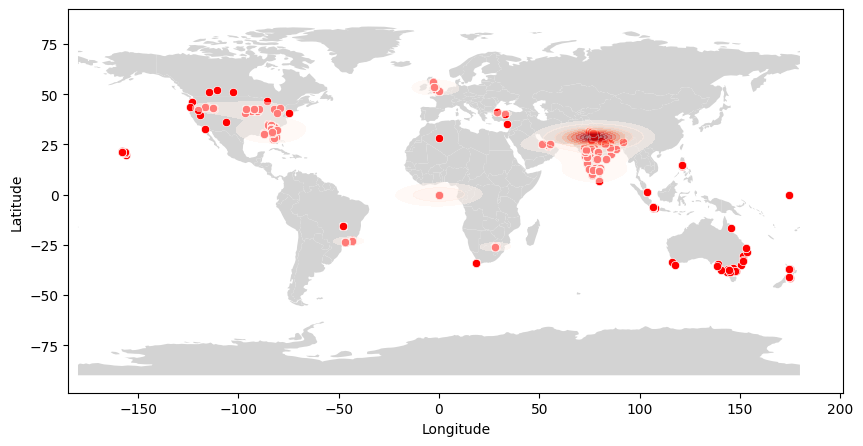

In [82]:
# Plot the locations of restaurants on a map using longitude and latitude coordinates.
# Identify any patterns or clusters of restaurants in specific areas.
import geopandas as gpd
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

fig,axes=plt.subplots(figsize=(10,6))

world.plot(ax=axes,color='lightgray')

sns.scatterplot(x=df['Longitude'],y='Latitude',color='red',data=df)

sns.kdeplot(x=df['Longitude'], y=df['Latitude'], cmap="Reds", fill=True, alpha=0.5, ax=axes)

**1. No.of restaurants in India In New delhi is more compared to other locations.**

**2. Other Locations are having less restaurants, might be less competitive for opening a new restaurant.**

# Restaurant Chains

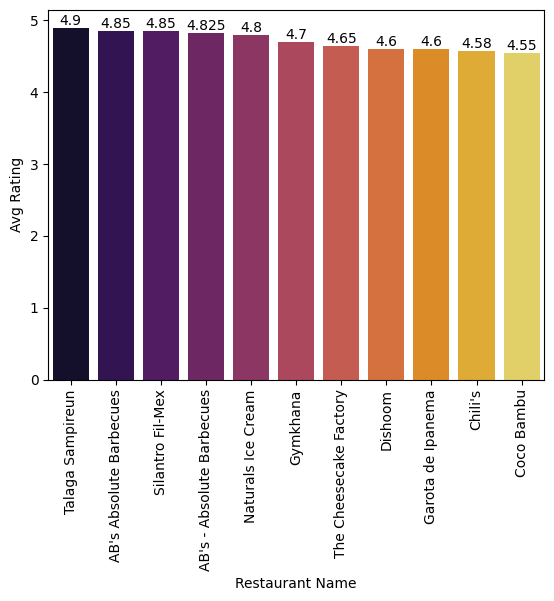

In [83]:
# Identify if there are any restaurant chains  present in the dataset. Analyze the ratings and popularity of  different restaurant chains.
rest=df['Restaurant Name'].value_counts()
chains=rest[rest>1].index
chain_data=df[df['Restaurant Name'].isin(chains)]
data=chain_data.pivot_table(values=['Rating','Votes'],index='Restaurant Name',aggfunc=['mean','sum']).sort_values(by=('mean','Rating'),ascending=False)
a=sns.barplot(x='Restaurant Name',y=('mean','Rating'),data=data[:11],hue='Restaurant Name',palette='inferno')
data_label(a)
plt.ylabel('Avg Rating')
plt.xticks(rotation=90)
plt.show()

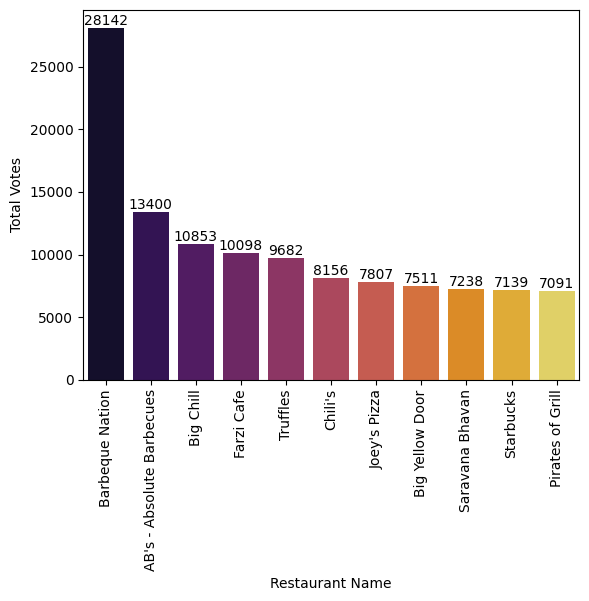

In [84]:
data=chain_data.pivot_table(values=['Rating','Votes'],index='Restaurant Name',aggfunc=['mean','sum']).sort_values(by=('sum','Votes'),ascending=False)
a=sns.barplot(x='Restaurant Name',y=('sum','Votes'),data=data[:11],hue='Restaurant Name',palette='inferno')
data_label(a)
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()

# Restaurant Reviews

<Axes: >

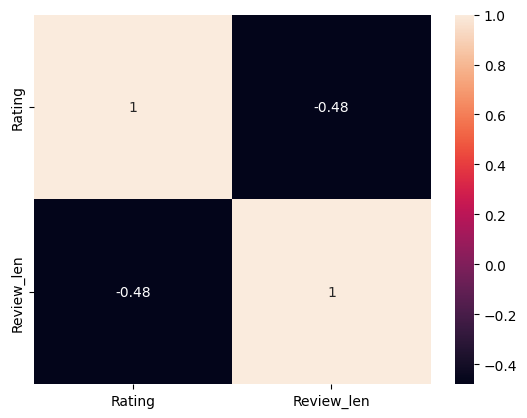

In [85]:
# Calculate the average length of reviews and explore if there is a relationship between review length and rating.
df['Review_len']=[len(i) for i in df['Rating text']]
rate=df.iloc[:,[12,16]].corr()
sns.heatmap(rate,annot=True)

**Rating and review length both are negatively correlated.**

# Votes Analysis

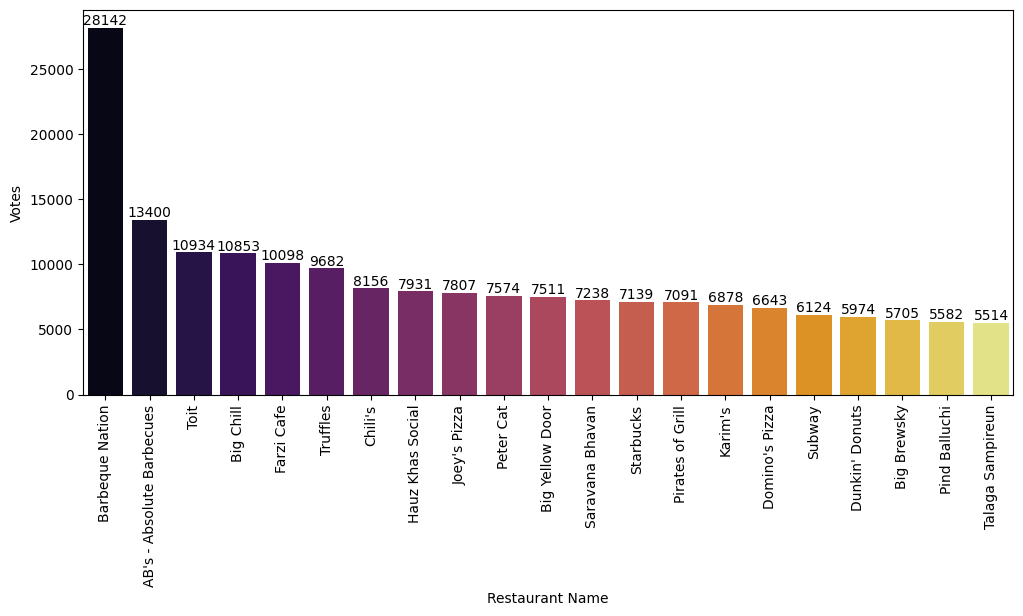

In [86]:
# Identify the restaurants with the highest andlowest number of votes.
votes=df.groupby('Restaurant Name')['Votes'].sum()
votes=pd.DataFrame(votes).sort_values(by='Votes',ascending=False)
plt.figure(figsize=(12,5))
a=sns.barplot(x='Restaurant Name',y='Votes',data=votes[:21],hue='Restaurant Name',palette='inferno')
data_label(a)
plt.xticks(rotation=90)
plt.show()


**Barbeque Nation and Abselute Barbeques are having highest votes.**

<Axes: >

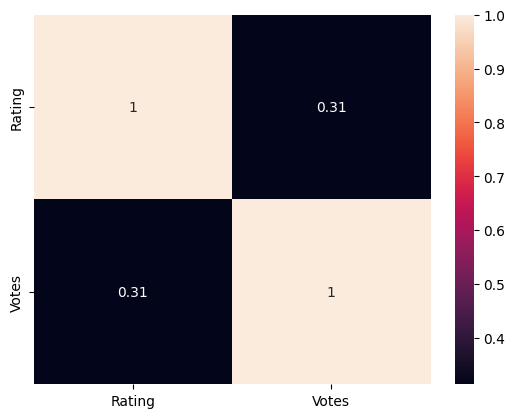

In [87]:
# Analyze if there is a correlation between the number of votes and the rating of a restaurant.
cor=df.iloc[:,[12,15]].corr()
sns.heatmap(cor,annot=True)

**Rating and Votes both are positively correlated with each other.**

# Price Range vs. Online Delivery andTable Booking

<Figure size 1000x500 with 0 Axes>

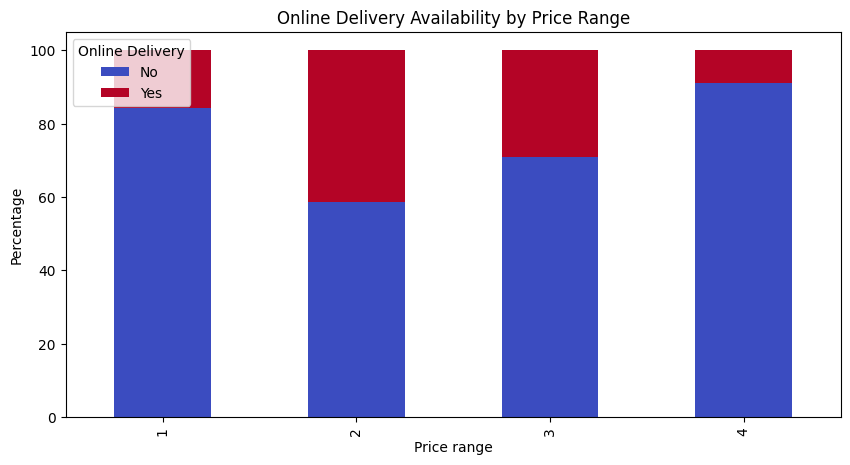

<Figure size 1000x500 with 0 Axes>

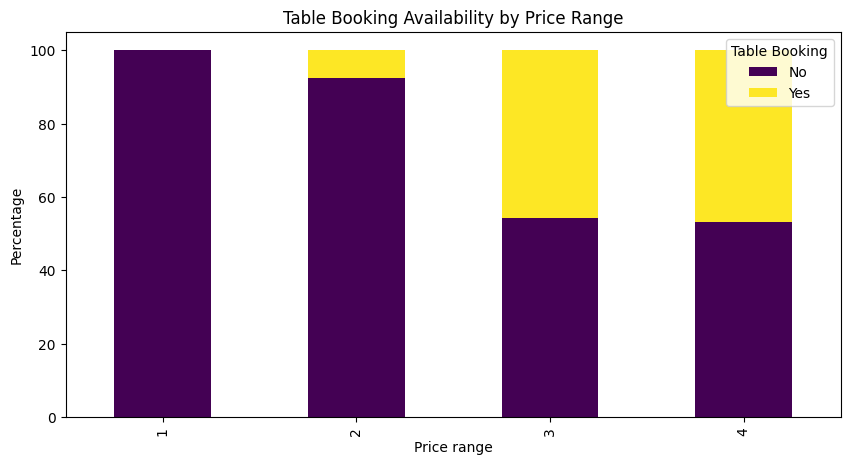

In [88]:
# Analyze if there is a relationship between the price range and the availability of onlinedelivery and table booking.
# Determine if higher-priced restaurants aremore likely to offer these services.



# Calculate % of restaurants offering delivery and booking per price range
delivery_counts = df.groupby('Price range')['online_order'].value_counts(normalize=True).unstack() * 100
booking_counts = df.groupby('Price range')['book_table'].value_counts(normalize=True).unstack() * 100

# Plot Online Delivery vs. Price Range
plt.figure(figsize=(10, 5))
delivery_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 5))
plt.ylabel("Percentage")
plt.title("Online Delivery Availability by Price Range")
plt.legend(title="Online Delivery")
plt.show()

# Plot Table Booking vs. Price Range
plt.figure(figsize=(10, 5))
booking_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 5))
plt.ylabel("Percentage")
plt.title("Table Booking Availability by Price Range")
plt.legend(title="Table Booking")
plt.show()

**1. Higher priced restaurants are offering book table facility.**

**2.Higher priced restaurants are not providing online order facility.**